Background of Problem Statement :
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.


Domain: Finance and Housing


Analysis Tasks to be performed:
1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV,KFold,learning_curve,train_test_split,validation_curve

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel("1553768847_housing.xlsx")

In [5]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [6]:
df.shape

(20640, 10)

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [8]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

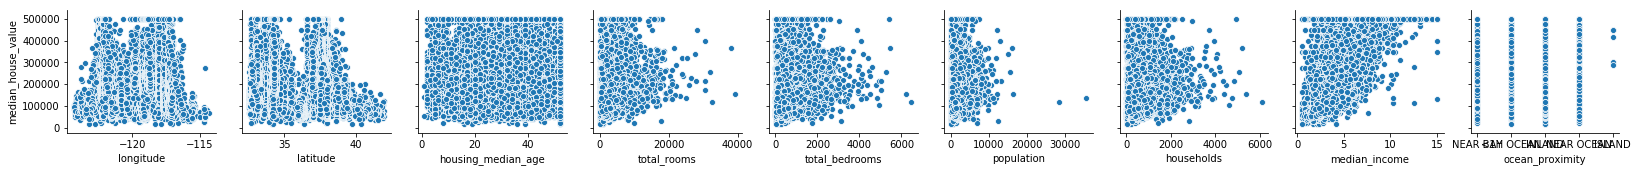

In [17]:
sns.pairplot(df,
             x_vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
            y_vars='median_house_value'
            )

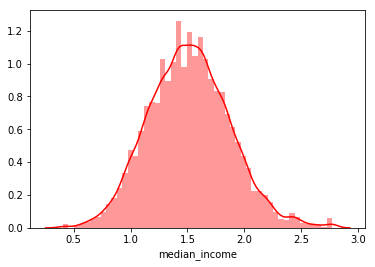

In [24]:
#sns.distplot(df)
ax = sns.distplot(np.log1p(df['median_income']),kde=True,color='r')

In [25]:
#Handle missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [26]:
#Fill the null values in totalbedroom column with mean
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [29]:
df.isna().sum().sum()

0

In [31]:
# Convert categorical column to numerical data
df.select_dtypes(include='object').columns

Index(['ocean_proximity'], dtype='object')

In [46]:
print("Unique values of ocean proximity columns are:-" )
print("----------------------------------------------")
print(df['ocean_proximity'].unique(),end='\n\n')
print("Value counts for each unique values")
print("------------------------------------")
print(df['ocean_proximity'].value_counts())

Unique values of ocean proximity columns are:-
----------------------------------------------
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

Value counts for each unique values
------------------------------------
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


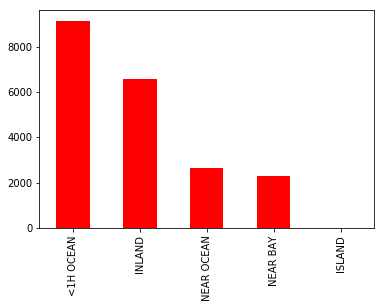

In [37]:
df['ocean_proximity'].value_counts().plot.bar(color='r')

In [48]:
ocean_prox_dict={'NEAR BAY':1,
                 '<1H OCEAN':2,
                 'INLAND' :3,
                 'NEAR OCEAN':4,
                 'ISLAND' :5}

df['ocean_proximity'].replace(ocean_prox_dict,inplace=True)

In [49]:
df['ocean_proximity'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

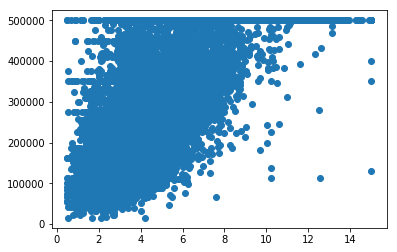

In [88]:
plt.scatter(x=df['median_income'],y=df['median_house_value'])

In [90]:
#multicollinearity
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.180381,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.067586,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,-0.204882,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.014818,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.004060,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.008511,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.016911,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,-0.129135,0.688075
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,1.000000,-0.210600
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,-0.210600,1.000000


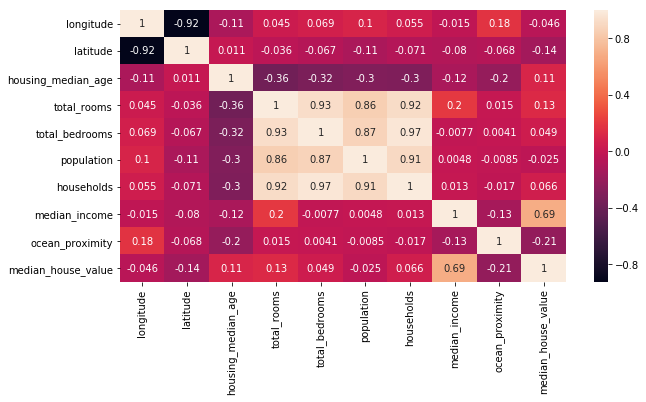

In [93]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

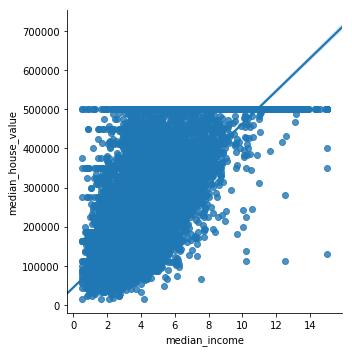

In [108]:
sns.lmplot(x='median_income',y='median_house_value',data=df)

In [94]:
#variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# X and Y
feature_cols=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
x=df[feature_cols]
y=df['median_house_value']

In [104]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,669.987040,longitude
1,559.522456,latitude
2,7.655272,housing_median_age
3,29.546610,total_rooms
4,71.905096,total_bedrooms
5,16.194033,population
6,74.788466,households
7,8.355497,median_income
8,10.120760,ocean_proximity


In [107]:
vif.sort_values('VIF Factor',ascending=False) # All features with vif factor above 10 are multicollinear

,VIF Factor,features
0,669.987040,longitude
1,559.522456,latitude
6,74.788466,households
4,71.905096,total_bedrooms
3,29.546610,total_rooms
5,16.194033,population
8,10.120760,ocean_proximity
7,8.355497,median_income
2,7.655272,housing_median_age


In [64]:
#target='median_house_value'
#feat_cols=[col for col in df.columns if col != target]
#df[feat_cols].head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train :-",x_train.shape)
print("x_test :-",x_test.shape)
print("y_train :-",y_train.shape)
print("y_test :-",y_test.shape)

x_train :- (16512, 9)
x_test :- (4128, 9)
y_train :- (16512,)
y_test :- (4128,)


In [69]:
se=StandardScaler()
x_train_scaled=se.fit_transform(x_train)
x_test_scaled=se.fit_transform(x_test)

In [72]:
# Perform Linear Regression

In [74]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
y_pred_linereg=linereg.predict(x_test_scaled)
print('R2 score of linear regression is {0:.2f}%'.format(r2_score(y_test,y_pred_linereg)))
print('Mean squared Error of linear regression is {0}'.format(mean_squared_error(y_test,y_pred_linereg)))
print('RMSE of linear Regression is',np.sqrt(mean_squared_error(y_test,y_pred_linereg)))

R2 score of linear regression is 0.63%
Mean squared Error of linear regression is 4880925495.989988
RMSE of linear Regression is 69863.62069052811


In [112]:
# coefficients of regressor
[i for i in zip(x.columns,linereg.coef_)]

[('longitude', -84910.98789254973),
 ('latitude', -90121.32355616982),
 ('housing_median_age', 14278.762017010058),
 ('total_rooms', -15179.216229192221),
 ('total_bedrooms', 36929.01803391569),
 ('population', -44176.027499731616),
 ('households', 27082.418035125334),
 ('median_income', 75827.24510223373),
 ('ocean_proximity', -2223.780289822518)]

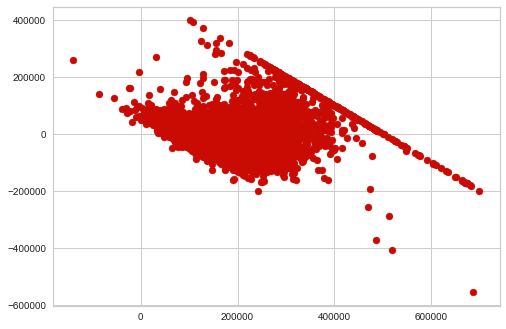

In [121]:
# Residual analysis
# Assumptions are residuals follows normality , same variance,
resid=y_test-y_pred_linereg
plt.scatter(y_pred_linereg,resid,c='r')

In [119]:
from yellowbrick.regressor import ResidualsPlot

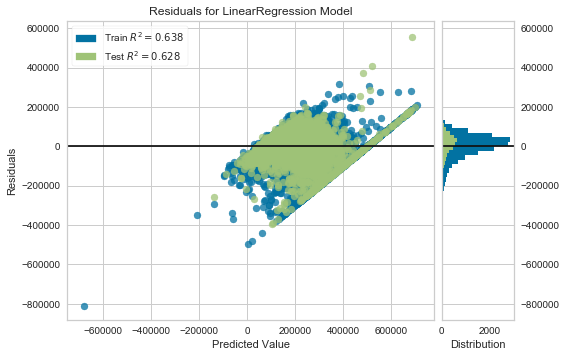

In [120]:
visualizer = ResidualsPlot(linereg)

visualizer.fit(x_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show() 

A common use of the residuals plot is to analyze the variance of the error of the regressor. 
If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data;
otherwise, a non-linear model is more appropriate. In the case above, the residuals are not randomly distributed. So a linear model is not a good fit 

We can also see from the histogram that our error is normally distributed around zero, which also generally indicates 
a well fitted model.

Also most of the predictor variables does not have a linear realtionship with target. and most of the predictors are multicollinear

### Perform Decision Tree Regression

In [123]:
decmodel=DecisionTreeRegressor()
decmodel.fit(x_train_scaled,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [124]:
y_pred_dec=decmodel.predict(x_test_scaled)

In [125]:
print('R2 score of Decision Tree regression is {0:.2f}%'.format(r2_score(y_test,y_pred_dec)))
print('Mean squared Error of decision tree regression is {0}'.format(mean_squared_error(y_test,y_pred_dec)))
print('RMSE of decision tree Regression is',np.sqrt(mean_squared_error(y_test,y_pred_dec)))

R2 score of Decision Tree regression is 0.64%
Mean squared Error of decision tree regression is 4718043861.712936
RMSE of decision tree Regression is 68688.01832716487


### Perform Random Forest Regression

In [128]:
rfmodel=RandomForestRegressor()
rfmodel.fit(x_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [129]:
y_pred_rf=rfmodel.predict(x_test_scaled)

In [196]:
print('R2 score of RF regression is {0:.2f}%'.format(r2_score(y_test,y_pred_rf)))
print('Mean absolute Error of RF regression is {0}'.format(np.round(mean_absolute_error(y_test,y_pred_rf),2)))
print('Mean squared Error of RF regression is {0}'.format(mean_squared_error(y_test,y_pred_rf)))
print('RMSE of RF Regression is',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 score of RF regression is 0.78%
Mean absolute Error of RF regression is 35911.5
Mean squared Error of RF regression is 2906779314.6066732
RMSE of RF Regression is 53914.5556840328


In [192]:
print("coefficent of determination on training set",rfmodel.score(x_train_scaled,y_train))
print("coefficent of determination on testing set",rfmodel.score(x_test_scaled,y_test))

coefficent of determination on training set 0.9637560034188202
coefficent of determination on testing set 0.7783944800046361


In [190]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)

scores=cross_validate(estimator=rfmodel,
    X=x,
    y=y,
    scoring='neg_mean_squared_error',
    cv=kf,
    return_train_score=True
    )

for i in scores.keys():
    print(i,scores[i].mean())

fit_time 0.9367888450622559
score_time 0.005869269371032715
test_score -2669783541.9748216
train_score -476306145.6172584


### Perform Linear Regression with one independant variable

In [143]:
predictor='median_income'
x_train_one=x_train[[col for col in x_train.columns if col == predictor]]
x_test_one=x_test[[col for col in x_test.columns if col == predictor]]
x_train_one.head(2)

,median_income
15961,3.1908
1771,3.6094


In [144]:
print("x_train changed :-",x_train_one.shape)
print("x_test changed :-",x_test_one.shape)
print("y_train :-",y_train.shape)
print("y_test :-",y_test.shape)

x_train changed :- (16512, 1)
x_test changed :- (4128, 1)
y_train :- (16512,)
y_test :- (4128,)


In [145]:
linereg_one=LinearRegression()
linereg_one.fit(x_train_one,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
y_pred_linereg_one=linereg_one.predict(x_test_one)

In [147]:
print('R2 score of linear regression with one predictoris {0:.2f}%'.format(r2_score(y_test,y_pred_linereg_one)))
print('Mean squared Error of linear regression with one predictor is {0}'.format(mean_squared_error(y_test,y_pred_linereg_one)))
print('RMSE of linear Regression with one predictoris',np.sqrt(mean_squared_error(y_test,y_pred_linereg_one)))

R2 score of linear regression with one predictoris 0.47%
Mean squared Error of linear regression with one predictor is 6926929696.091081
RMSE of linear Regression with one predictoris 83228.17849797675


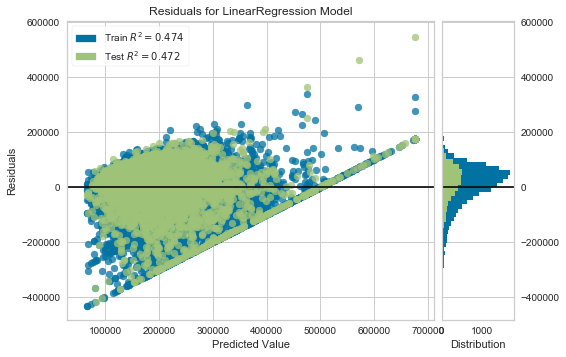

In [151]:
visualizer=ResidualsPlot(linereg_one)
visualizer.fit(x_train_one,y_train)
visualizer.score(x_test_one,y_test)
visualizer.poof()

In [158]:
linereg_one.coef_,linereg_one.intercept_

(array([42055.4573838]), 44721.83362106787)

[]

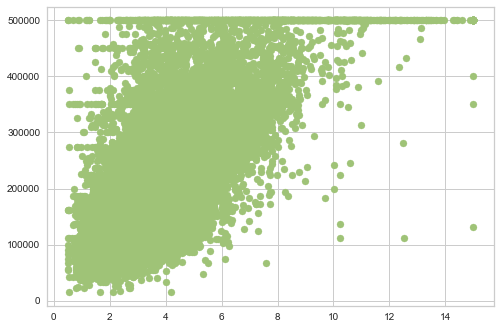

In [163]:
yhat=44721.83362106787+42055.4573838*df['median_income']
plt.scatter(x=df['median_income'],y=df['median_house_value'],c='g')
plt.plot(x=df['median_income'],y=yhat,c='orange')

### Feature Importance

In [164]:
# For feature selection using Lasso ( Least Absolute shrinkage and selection operator)
from sklearn.linear_model import Lasso

In [205]:
la=Lasso(alpha=0.619,normalize=True)
la.fit(x_train_scaled,y_train)

Lasso(alpha=0.619, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
from yellowbrick.regressor import AlphaSelection

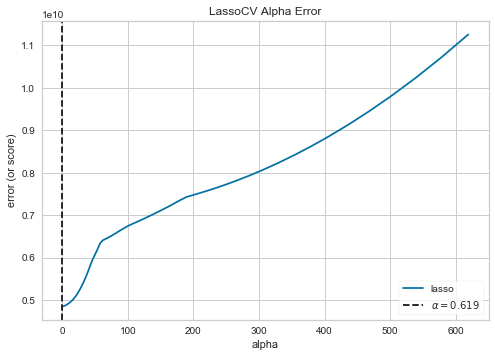

In [204]:
model = AlphaSelection(LassoCV(normalize=True))
model.fit(x_train_scaled, y_train)
model.show()

In [206]:
sorted([i for i in zip(x_train.columns,la.coef_)],key=lambda x: x[1],reverse=True)


[('median_income', 75543.59206359883),
 ('total_bedrooms', 35711.83689252885),
 ('households', 26461.14254885632),
 ('housing_median_age', 14321.668494685138),
 ('ocean_proximity', -2296.735785742193),
 ('total_rooms', -13796.720747576914),
 ('population', -43636.57049920147),
 ('longitude', -84018.77213398779),
 ('latitude', -89263.59087126692)]

In [169]:
decmodel.feature_importances_

array([0.12412353, 0.10434698, 0.05666326, 0.02550541, 0.02202683,
       0.03018025, 0.01652211, 0.50552719, 0.11510443])

In [178]:
sorted([i for i in zip(x_train.columns,decmodel.feature_importances_)],key=lambda x: x[1],reverse=True)

[('median_income', 0.5055271882085037),
 ('longitude', 0.12412353326804533),
 ('ocean_proximity', 0.11510443297476596),
 ('latitude', 0.10434697803303537),
 ('housing_median_age', 0.05666326488953443),
 ('population', 0.030180249345029327),
 ('total_rooms', 0.02550540574867299),
 ('total_bedrooms', 0.022026834081268643),
 ('households', 0.01652211345114424)]